## What is a Decision Tree?
- A **Decision Tree** is a flowchart-like structure used for classification and regression tasks in ML.
- It splits the dataset based on feature values, creating branches that lead to a decision(classification label or numeric output).
- A **Decision Tree** has the following Nodes:-
    * **Root Node**: The starting point where the dataset is first split.
    * **Decision Nodes**: Internal Nodes where a feature is tested.
    * **Leaf Nodes**: Terminal Nodes where a final output or decision is made.

### How it works?
- The tree splits the data based on features that give the most information about the target.
- It recursively partitions the data until one of the following conditions is met:
    + All samples belong to one **class**.
    + The **maximum depth** is reached.
    + The split doen't improve the outcome significantly. 

### Splitting Criteria
1. #### Gini Impurity: 
    - The tree chooses splits that best separate the classes.
    - *Gini* =  1 - $\Sigma(p_i)^2$, where $p_i$ is the proportion of class *i* at that Node.
    - Measuers how mixed the classes are.
    - Lower is better.

2.  #### Entropy:
    - Measures disorder
    - *Entorpy* = - $\Sigma p_ilog_2 (p_i)$
    - Lower Entropy means purer nodes.

3.  #### Information Gain
    - Measures how much uncertainity is reduced after splitting.
    
4.  #### Mean Squared Error
    - Used to decide splits when predicting continuous values.

- #### Advantages:
    1. Easy to interpret
    2. Requires little data preprocessing
    3. Handles both numerical and categorical data
    4. Non-Linear relationships can be captured
    5. Can be visualized graphically

-  #### Disadvantages
    1. Prone to overfitting -> Trees can grow very deep
    2. Small changes in data can lead to very different branches of trees
    3. Poor generalization without pruning or ensemble methods.
    4- Bias toward features with more categories

## Coding Decision Tree From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [12]:
class Node:
    ''' 
        Represents a Node in the decision trees.
    '''
    def __init__(self, feature_idx = None, threshold = None, left = None, right = None, * , value = None):
        
        #Args for Decision Nodes
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right
        
        #Arg for Leaf Node
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None
    

In [19]:
class DecisionTree:
    def __init__(self, min_samples_split = 2, max_depth = 100, n_features = None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
    
    def _calculate_mse(self, y):
        '''
            Function to calculate the Mean-Squared Error of a group.
        '''
        
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)
    
    def _best_split(self, X, y, feature_indices):
        ''' 
            Find the best feature and threshold to spit the data
        '''
        
        best_mse = float('inf') #Initialize with Infinity
        best_split = {}
        
        for feature_index in feature_indices:
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]
                
                if len(left_indices) > 0 and len(right_indices) > 0:
                    y_left = y[left_indices]
                    y_right = y[right_indices]

                    #Calculate the MSE
                    mse = (len(y_left) / len(y)) * self._calculate_mse(y_left) + (len(y_right) / len(y)) * self._calculate_mse(y_right)
                    
                    if mse < best_mse:
                        best_mse = mse
                        best_split = {
                            'feature_index':feature_index,
                            'threshold':threshold,
                            'left_indices':left_indices,
                            'right_indices':right_indices,
                        }
                        
        return best_split


    def _grow_tree(self, X, y, depth = 0):
        '''
            Function to Recursively grow the tree 
        '''
        
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if(depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = np.mean(y)
            return Node(value = leaf_value)

        if self.n_features is None:
            feature_indices = np.arange(n_features)
        else:
            feature_indices = np.random.choice(n_features, self.n_features, replace = False)
        best_split = self._best_split(X,y,feature_indices)
        
        if not best_split:
            leaf_value = np.mean(y)
            return Node(value = leaf_value)
        
        left_indices, right_indices = best_split['left_indices'], best_split['right_indices']
        left_child = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)
        
        return Node(best_split['feature_index'], best_split['threshold'], left_child, right_child)
    
    def fit(self, X, y):
        self.root = self._grow_tree(X, y)
        
    def _traverse_tree(self, x, node):
        ''' 
            Traverse the tree to find the prediction for a single sample 
        '''
        if node.is_leaf_node():
            return node.value
        if x[node.feature_idx] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
        
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
        

### Visualization 

- Loading Data and Train-Test Split

In [ ]:
X, y = make_regression(n_samples = 500, n_features = 10, n_informative = 5, noise = 20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("="*10,f"Train Dataset shape: {X_train.shape}", "="*10)

========== Train Dataset shape: (400, 10) ==========
Number of labels:


- Training the Model

In [20]:
model = DecisionTree(max_depth = 10)
model.fit(X_train, y_train)
model_preds = model.predict(X_test)
model_err = np.mean((y_test - model_preds) ** 2)
print("="*10, f"Decision Tree MSE: {model_err:.2f}","="*10 )

========== Decision Tree MSE: 2126.67 ==========


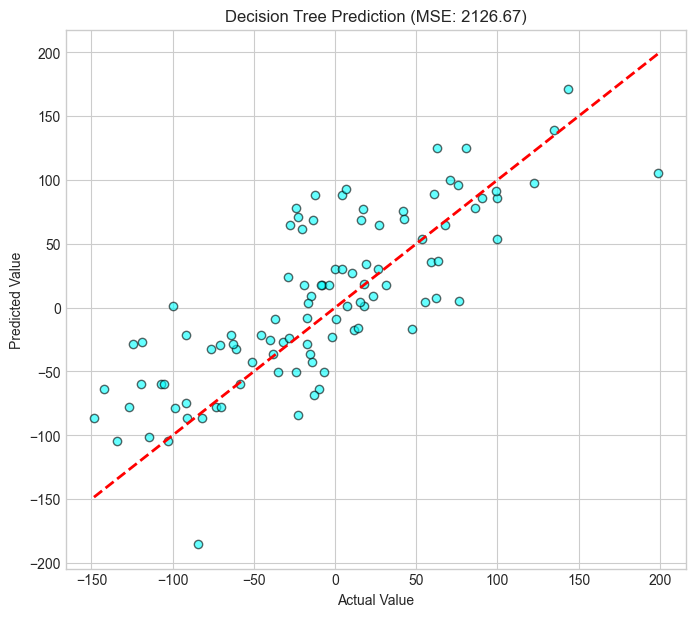

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (8,7))
plt.scatter(y_test, model_preds, alpha = 0.6, edgecolors = 'k', c = 'cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title(f"Decision Tree Prediction (MSE: {model_err:.2f})")
plt.show()

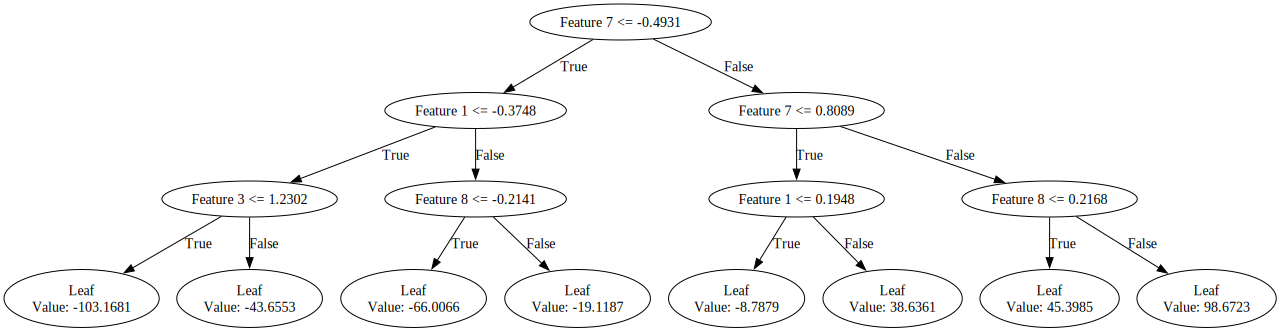

In [27]:
from graphviz import Digraph
from IPython.display import display

def add_nodes_edges(tree, dot=None, node_id=0, feature_names=None):
    if dot is None:
        dot = Digraph()
    
    if tree.is_leaf_node():
        dot.node(str(node_id), f"Leaf\nValue: {tree.value:.4f}")
    else:
        feature = feature_names[tree.feature_idx] if feature_names else f"Feature {tree.feature_idx}"
        label = f"{feature} <= {tree.threshold:.4f}"
        dot.node(str(node_id), label)
        
        left_id = node_id * 2 + 1
        right_id = node_id * 2 + 2
        
        dot.edge(str(node_id), str(left_id), label="True")
        dot.edge(str(node_id), str(right_id), label="False")
        
        add_nodes_edges(tree.left, dot, left_id, feature_names)
        add_nodes_edges(tree.right, dot, right_id, feature_names)
        
    return dot

# Usage
dot = add_nodes_edges(tree.root, feature_names=['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10' ])
display(dot)